# この notebook を読み進める前に
TeX 出力のためには次のコードを読み込ませること。

In [1]:
from sympy import *
from IPython.display import display
init_printing()

# シンボル定義
x = Symbol('x')
y = Symbol('y')
z = Symbol('z')

# 公式から

適当に翻訳しつつ記録していく.
ここでの「適当」は面倒だったら適当に省略したり、正確な訳語をつけるためにがんばったりしないという程度の意味。

- [Basic functionality of the module](http://docs.sympy.org/latest/modules/polys/basics.html)
- [Examples from Wester’s Article](http://docs.sympy.org/latest/modules/polys/wester.html)
- [Polynomials Manipulation Module Reference](http://docs.sympy.org/latest/modules/polys/reference.html)

# Basic functionality of the module

## 有理数係数での商とあまり
関数 `div()` で多項式の商とあまりが計算できる：
多項式 $f$, $g$ に対して $f=gq + r$ として商 $q$ と $r$ が求められる。
ここで $\mathrm{deg}(r) < \mathrm{deg} (q)$。

体係数の多項式については次のように求められる。

In [2]:
f = 5*x**2 + 10*x + 3
g = 2*x + 2

display(f)
display(g)

多項式の割り算をしてみる.
`domain = 'QQ'` は $\mathbb{Q}$ （有理数体）を指定している.

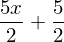

In [3]:
q, r = div(f, g, domain='QQ')
display(q)
display(r)

次のように書けば復元できる。

In [4]:
(q*g + r).expand()

## 整数係数の多項式
上の結果を見ればわかるように、商が有理数係数だから、`domain = 'ZZ'` で係数を有理整数環に指定すると割り算できないといわれる。

In [5]:
q, r = div(f, g, domain='ZZ')
display(q)
display(r)

整数の世界でも割れるように $g$ を取り換えてみる。

In [6]:
f = 5*x**2 + 10*x + 3
g = 5*x + 1
display(f)
display(g)

In [7]:
q, r = div(f, g, domain='ZZ')
display(q)
display(r)

復元できることを確認。

In [8]:
(q*g + r).expand()

## 多変数の多項式

In [11]:
f = x*y + y*z
g = 3*x + 3*z
display(f)
display(g)

In [13]:
q, r = div(f, g, domain='QQ')
display(q)
display(r)
display(expand(g*q + r))

## GCD と LCM
GCD は greatest common divisor で最大公約元、
LCM は least common multiple で最小公倍元。
多項式にもある。

In [14]:
f = (12 * x + 12) * x
g = 16 * x**2
display(f)
display(g)

In [15]:
gcd(f,g)

有理数係数の場合は（なぜか）モニックな多項式（最高次の係数が 1）を返す。

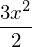

In [18]:
f = 3*x**2/2
g = 9*x/4

display(f)
display(g)

display(gcd(f, g))

### 多変数の多項式に対する GCD

デフォルトではアルファベット順に並ぶ。有理数係数ではやはりモニックになる。

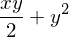

In [19]:
f = x*y/2 + y**2
g = 3*x + 6*y

display(f)
display(g)

display(gcd(f, g))

GCD と LCM の性質もついでに確認：GCD と LCM の積は元の関数同士の積になる。

In [20]:
f = x*y**2 + x**2*y
g = x**2*y**2
display(f)
display(g)

In [22]:
display(gcd(f, g))
display(lcm(f, g))

In [23]:
display((f*g).expand())
display((gcd(f, g, x, y)*lcm(f, g, x, y)).expand())

## 無平方（square-free）の因数分解
よくわからないが、一変数多項式の無平方分解は既約とは限らない因子の積。

In [25]:
f = 2*x**2 + 5*x**3 + 4*x**4 + x**5
display(f)

どの項が何回出てくるかリストでとれる。
意味が分からないなら下の `sqf()` の結果と比較してみよう。

In [26]:
display(sqf_list(f))

In [27]:
display(sqf(f))

## 有理数係数の多項式の因数分解
`factor()` を使う。

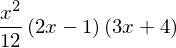

In [28]:
factor(x**4/2 + 5*x**3/12 - x**2/3)

## グレブナー基底
いくつか単項式の順序の指定法がある。
（具体的にどうやって使えばまだよくわかっていない。公式の該当ページをもっと深く見ればわかるだろう。）

In [29]:
f = groebner([x**2 + 1, y**4*x + x**3], x, y, order='lex')
display(f)

In [30]:
f = groebner([x**2 + 1, y**4*x + x**3, x*y*z**3], x, y, z, order='grevlex')
display(f)

## 代数方程式を解く

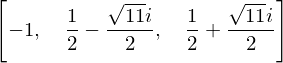

In [32]:
from sympy import roots, solve_poly_system
display(solve(x**3 + 2*x + 3, x))

変数係数でも解ける。

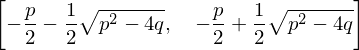

In [33]:
p = Symbol('p')
q = Symbol('q')
solve(x**2 + p*x + q, x)

連立多項式でも解ける。

In [34]:
solve_poly_system([y - x, x - 5], x, y)

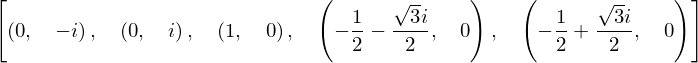

In [35]:
solve_poly_system([y**2 - x**3 + 1, y*x], x, y)

# Examples from Wester’s Article

- [URL](http://docs.sympy.org/latest/modules/polys/wester.html)

[ここ](http://docs.sympy.org/latest/modules/polys/wester.html#wester1999)も見るといいらしい。

## 注意
次のセルを実行しておくこと。

In [36]:
var('x,y,z,s,c,n')

## 単純な一変数多項式の因数分解
`factor()` が基本。

In [37]:
factor(6*x - 10)

### `primitive()`
因子を分けて取りたいなら `primitive()` を使おう。

In [38]:
primitive(6*x - 10)

## 一変数での GCD、終結式（resultant）、因数分解
整係数多項式を考える。

In [39]:
f = 64*x**34 - 21*x**47 - 126*x**8 - 46*x**5 - 16*x**60 - 81
g = 72*x**60 - 25*x**25 - 19*x**23 - 22*x**39 - 83*x**52 + 54*x**10 + 81
h = 34*x**19 - 25*x**16 + 70*x**7 + 20*x**3 - 91*x - 86

display(f)
display(g)
display(h)

### GCD

In [40]:
gcd(f, g)

$f*h$, $g*h$ は $h$ を共通因子に持つことを次のような形で確認してみる。

In [43]:
display(gcd(expand(f*h), expand(g*h)))
display(gcd(expand(f*h), expand(g*h)) - h)

同じことを終結式で確認。

In [44]:
resultant(expand(f*h), expand(g*h))

巨大な次数の（一変数）多項式の因数分解もできる。

In [45]:
display(factor(expand(f*g)))

## 多変数での GCD と因数分解

In [46]:
f = 24*x*y**19*z**8 - 47*x**17*y**5*z**8 + 6*x**15*y**9*z**2 - 3*x**22 + 5
g = 34*x**5*y**8*z**13 + 20*x**7*y**7*z**7 + 12*x**9*y**16*z**4 + 80*y**14*z
h = 11*x**12*y**7*z**13 - 23*x**2*y**8*z**10 + 47*x**17*y**5*z**8
display(f)
display(g)
display(h)

In [47]:
display(gcd(f, g))

GCD の動きを見るために無理やり $h$ をかける。

In [49]:
display(gcd(f*h, g*h) - h)

多変数でも因数分解をやってみよう。

In [51]:
display(factor(f))
display(factor(g))

In [52]:
display(factor(expand(f*g)))

## 共通零点をもつかどうか
終結式 (resultant) を使う：一般論によって共通零点を持っていると終結式が消える。

In [55]:
p = 3*x**4 + 3*x**3 + x**2 - x - 2
q = x**3 - 3*x**2 + x + 5

display(p)
display(q)

In [56]:
display(factor(p))
display(factor(q))
display(gcd(p,q))
display(resultant(p, q))

## 有理式の単純化

`cancel()` を使う。

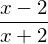

In [59]:
p = x**2 - 4
q = x**2 + 4*x + 4

display(p)
display(q)
display(cancel(p / q))

##  多項式の展開と因数分解

In [62]:
f = (x+1)**20
display(f)

In [63]:
g = expand(f)
display(expand(g))

In [65]:
h = diff(g, x)
display(h)
display(factor(h))

## （実係数での）円分多項式

In [66]:
p = x**15 - 1
display(p)
display(factor(p))

## ガウスの整数上で一変数多項式を因数分解

In [67]:
f = 4*x**4 + 8*x**3 + 77*x**2 + 18*x + 153
display(f)

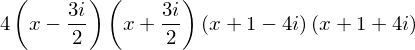

In [68]:
display(factor(f))
display(factor(f, gaussian=True))

`gaussian` 以外のシンタックスでも同じことができる。

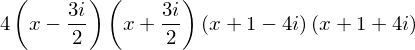

In [69]:
display(factor(f, extension=I))

## 体を拡大して因数分解

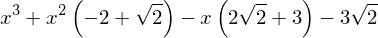

In [70]:
f = x**3 + (sqrt(2) - 2)*x**2 - (2*sqrt(2) + 3)*x - 3*sqrt(2)
g = x**2 - 2
display(f)
display(g)

有理式 $f/g$ を約分したいが、$\sqrt{2}$ は有理数ではないところで問題が起きる。

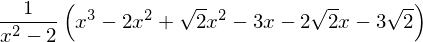

In [71]:
display(cancel(f/g))

実数を含んでいても約分させるためには `extension=True` を入れる。

実際には $f/g$ の係数に対して最小の代数拡大を考えている：今は $\mathbb{Q} (\sqrt{2})$ をとっている。

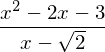

In [73]:
display(cancel(f/g, extension=True))

explicit に書いてみよう。

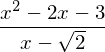

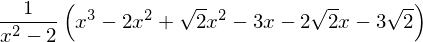

In [75]:
display(cancel(f/g, extension=sqrt(2)))
display(cancel(f/g, extension=sqrt(3)))

## いろいろな係数での一変数多項式の因数分解

In [87]:
f = x**4 - 3*x**2 + 1
display(f)
display(factor(f, extension=[I]))

## 複素数

- [参考](https://stackoverflow.com/questions/22089150/factor-to-complex-roots-using-sympy)

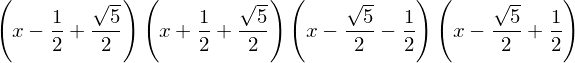

In [88]:
r = roots(f, x)
LC(f, x) * Mul(*[(x - a)**r[a] for a in r])

### 有理数

In [77]:
display(factor(f))

### 有限体
`modulus` で指定する。

In [81]:
display(factor(f, modulus=3))
display(factor(f, modulus=5))

### 代数的数
$\alpha = (\sqrt{5} - 1)/2$ とする.

In [85]:
alg = AlgebraicNumber((sqrt(5) - 1)/2, alias='alpha')
display(factor(f, extension=alg))

### 一次式への分解
[ここ](http://docs.sympy.org/latest/modules/polys/wester.html#factoring-polynomials-into-linear-factors)によると、将来的には `split` というオプション（？）をつける予定があるようだ。

### 有限体上の議論

In [89]:
f = x**11 + x + 1
display(f)

$\mathbb{F}_{65537}$ で因数分解してみる：これは対称多項式（？）を使った表現になっている。

In [92]:
g = factor(f, modulus=65537)
display(g)
display(expand(g))

非対称表現（？）は次のようになっている。

In [93]:
g = factor(f, modulus=65537, symmetric=False)
display(g)

In [96]:
g = factor(f, modulus=65537, symmetric=False)
display(expand(g, 65537))
display(trunc(expand(g), 65537))

## 多項式表現

「Working with expressions as polynomials」の部分なのだが、このときの「Working with」は何と訳すといいのだろう。

In [97]:
f = expand((x - 2*y**2 + 3*z**3)**20)
display(f)

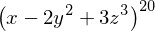

In [98]:
display(factor(f, expand=False))

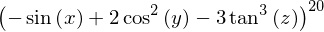

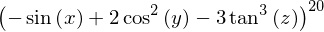

In [101]:
g = expand((sin(x) - 2*cos(y)**2 + 3*tan(z)**3)**20)
display(factor(g, expand=True))
display(factor(g, expand=False))

## 簡約グレブナー基底の計算

タイトルは「Computing reduced Gröbner bases」の訳なのだが、正しいだろうか？

In [ ]:
f = expand((1 - c**2)**5 * (1 - s**2)**5 * (c**2 + s**2)**10)
display(f)

In [105]:
g = groebner([f, c**2 + s**2 - 1])
display(g)

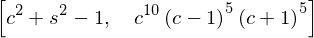

In [106]:
display(list(map(factor, g)))

In [107]:
display(solve([f, s**2 + c**2 - 1], c, s))

## 多変数多項式の代数的数の上での因数分解

$\mathbb{Q}(\sqrt{3})$ 上で議論してみる。

注：2018/06 時点では有限体係数の多変数多項式の因数分解はサポートされていない。

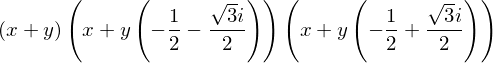

In [108]:
 display(factor(x**3 + y**3, extension=sqrt(-3)))

### 部分分数分解

`apart()` を使う。

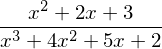

In [109]:
f = (x**2 + 2*x + 3)/(x**3 + 4*x**2 + 5*x + 2)
display(f)

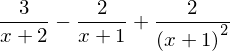

In [110]:
display(apart(f))

まとめたいときは `together()` を使う。

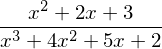

In [112]:
display(cancel(together(apart(f))))

# 公式のリファレンス

- [Polynomials Manipulation Module Reference](http://docs.sympy.org/latest/modules/polys/reference.html)

## `sympy.polys.polytools.poly(expr, *gens, **args)`
表現を多項式に変換する。

In [113]:
from sympy import poly
from sympy.abc import x
poly(x*(x**2 + x - 1)**2)

`sympy.polys.polytools.poly_from_expr(expr, *gens, **args)`

    Construct a polynomial from an expression.

`sympy.polys.polytools.parallel_poly_from_expr(exprs, *gens, **args)`

    Construct polynomials from expressions.


## `sympy.polys.polytools.degree(f, *gens, **args)`
指定した変数に対する $f$ の次数を返す。
$0$ の次数は $- \infty$ としている。

In [116]:
from sympy import degree
from sympy.abc import x, y

p = x**2 + y * x + 1
display(p)
display(degree(p, gen=x))
display(degree(p, gen=y))
display(degree(0, x))

## `sympy.polys.polytools.degree_list(f, *gens, **args)`

$f$ の全ての変数の対する実数のリストを返す。

In [2]:
from sympy import degree_list
from sympy.abc import x, y
f = x**2 + y*x + 1
display(f)
display(degree_list(f))

 ## `sympy.polys.polytools.LC(f, *gens, **args)`

多項式 $f$ の最高次の係数を返す。

In [3]:
from sympy import LC
from sympy.abc import x, y
p = 4*x**2 + 2*x*y**2 + x*y + 3*y
display(p)
display(LC(p))

## `sympy.polys.polytools.LM(f, *gens, **args)[source]`

$f$ の最高階の単項式を返す.

In [4]:
from sympy import LM
from sympy.abc import x, y
p = 4*x**2 + 2*x*y**2 + x*y + 3*y
display(p)
display(LM(p))

## `sympy.polys.polytools.LT(f, *gens, **args)`

$f$ の最高次の項を返す.

In [6]:
from sympy import LT
from sympy.abc import x, y
p = 4*x**2 + 2*x*y**2 + x*y + 3*y
display(p)
display(LT(p))

## `sympy.polys.polytools.pdiv(f, g, *gens, **args)`

多項式 $f$, $g$ の擬除算 (pseudo-division) を計算する.

(pseudo-division というのが何なのかよくわからない.)

In [9]:
from sympy import pdiv
from sympy.abc import x
p = x**2 + 1
q = 2*x - 4
display(p)
display(q)
display(pdiv(p, q))

## `sympy.polys.polytools.prem(f, g, *gens, **args)`

多項式 $f,g$ の擬剰余 (pseudo-remainder) を計算する.

In [11]:
from sympy import prem
from sympy.abc import x
p = x**2 + 1
q = 2*x - 4
display(p)
display(q)
display(prem(p, q))

## `sympy.polys.polytools.pquo(f, g, *gens, **args)`

多項式 $f,g$ の擬商 (pseudo-quotient) を計算する

In [13]:
from sympy import pquo
from sympy.abc import x
p = x**2 + 1
q = 2*x - 4
display(p)
display(q)
display(pquo(p, q))

## `sympy.polys.polytools.pexquo(f, g, *gens, **args)`

多項式の厳密な擬商 (pseudo-quotient) を計算する.

In [14]:
from sympy import pexquo
from sympy.abc import x
p = x**2 - 1
q = 2*x - 2
display(p)
display(q)
display(pexquo(p, q))

In [15]:
display(pexquo(p, 2*x - 4))

ExactQuotientFailed: 2*x - 4 does not divide x**2 - 1

## `sympy.polys.polytools.div(f, g, *gens, **args)`

多項式 $f,g $ の割り算を計算する.

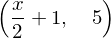

In [17]:
from sympy import div, ZZ, QQ
from sympy.abc import x
p = x**2 + 1
q = 2*x - 4
display(div(p, q, domain=ZZ))
display(div(p, q, domain=QQ))

## `sympy.polys.polytools.rem(f, g, *gens, **args)`

多項式 $f,g$ の割り算のあまりを計算する.

In [18]:
from sympy import rem, ZZ, QQ
from sympy.abc import x

display(rem(x**2 + 1, 2*x - 4, domain=ZZ))
display(rem(x**2 + 1, 2*x - 4, domain=QQ))

## `sympy.polys.polytools.quo(f, g, *gens, **args)`

多項式 $f,g$ の割り算のあまりを計算する.

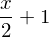

In [19]:
from sympy import quo
from sympy.abc import x

display(quo(x**2 + 1, 2*x - 4))
display(quo(x**2 - 1, x - 1))

## `sympy.polys.polytools.exquo(f, g, *gens, **args)`

多項式 $f,g$ の厳密な割り算の商とあまりを計算する.

In [21]:
from sympy import exquo
from sympy.abc import x
display(exquo(x**2 - 1, x - 1))

In [22]:
display(exquo(x**2 + 1, 2*x - 4))

ExactQuotientFailed: 2*x - 4 does not divide x**2 + 1

## `sympy.polys.polytools.half_gcdex(f, g, *gens, **args)`

$f,g$ に対するユークリッドの互除法の半拡張 (half extended).
$h = gcd(f,g)$, $s*f = h (\mod g)$ としたとき,
$(s,h)$ を返す.

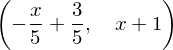

In [23]:
from sympy import half_gcdex
from sympy.abc import x
p = x**4 - 2*x**3 - 6*x**2 + 12*x + 15
q = x**3 + x**2 - 4*x - 4
display(p)
display(q)
display(half_gcdex(p, q))

## `sympy.polys.polytools.gcdex(f, g, *gens, **args)`

$f,g$ に対する拡張されたユークリッドの互除法.
$h = gcd(f, g)$ と $s*f + t*g = h$ に対して $(s,t,h)$ を返す.

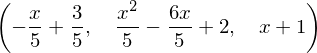

In [24]:
from sympy import gcdex
from sympy.abc import x
p = x**4 - 2*x**3 - 6*x**2 + 12*x + 15
q = x**3 + x**2 - 4*x - 4
display(p)
display(q)
display(gcdex(p, q))